# K-Means

In [33]:
import pandas as pd 
from matplotlib import pyplot as plt 

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import seaborn as sn

# Load Data

In [4]:
df = pd.read_csv("./datasets/data.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plot same Data

Text(0, 0.5, 'Income')

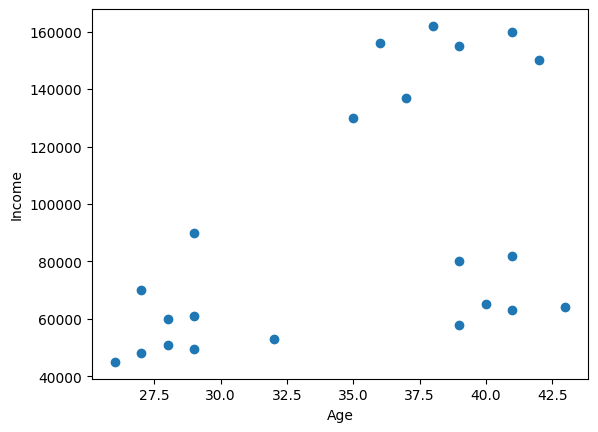

In [6]:
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")

# Pairplot

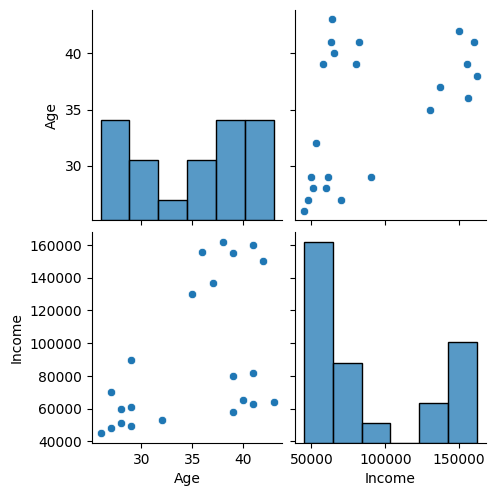

In [7]:
sn.pairplot(df)

# Build and Train the model

In [8]:
model = KMeans(n_clusters= 3)

# Fit the model and Assign the rows to the clusters
y_predicted = model.fit_predict(df[["Age", "Income"]])
y_predicted

c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [11]:
# Add the cluster column to the dataframe
df["cluster"] = y_predicted

# Sort based on the cluster
df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0
9,Angelina,35,130000,1
8,Brad,36,156000,1
7,Andrea,38,162000,1
10,Donald,37,137000,1
5,Gautam,39,155000,1
4,Kory,42,150000,1


## Centriods

In [12]:
# See the centrious of the clusters (x, y)
model.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

## Interia

In [13]:
# Sum of squared distances for each data point to the centroid
model.inertia_

1577046058.883117

# Split the clusters into 3x diff DataFrames

In [15]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

# Plot the clusters

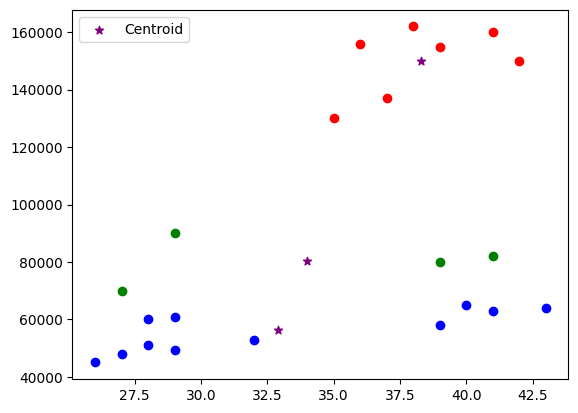

In [19]:
plt.scatter(df1["Age"], df1["Income"], color = "green")
plt.scatter(df2["Age"], df2["Income"], color = "red")
plt.scatter(df3["Age"], df3["Income"], color = "blue")


# Scatter the centroids
plt.scatter(model.cluster_centers_[:,0],  # 0 : x-values for all centriods
            model.cluster_centers_[:,1],  # 1 : y-values for all centroids
            color = "purple",
            marker = "*",
            label = "Centroid"
            )


plt.legend()

# Normalization of the data

scale the data from 0 to 1 (in general)


normalization -->  y = (x - min) / (max - min)

In [21]:
# create the scaler
scaler = MinMaxScaler( feature_range= (0,1) ) # desired range between 0 and 1

# Scale the Income
scaler.fit(df[["Income"]]) # calculate the scaler table  45k -- 162k
df["Income"]  = scaler.transform(df[["Income"]]) # do the changes


# Scale the Age column
scaler.fit(df[["Age"]]) # calculate the scaler table  27 - 45
df["Age"]  = scaler.transform(df[["Age"]]) # do the changes


In [22]:
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
9,Angelina,0.529412,0.726496,1


# Retraining using the normalized data

In [23]:
model = KMeans(n_clusters= 3)

# Fit the model and Assign the rows to the clusters
y_predicted = model.fit_predict(df[["Age", "Income"]])
y_predicted

c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [24]:
# Add the cluster column to the dataframe
df["cluster"] = y_predicted

# Sort based on the cluster
df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
15,Ranbir,0.352941,0.068376,0
14,Stark,0.176471,0.038462,0
13,Jared,0.117647,0.051282,0
12,Arnold,0.058824,0.025641,0
11,Tom,0.000000,0.000000,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
18,Nick,1.000000,0.162393,1


# Split the clusters into 3x diff DataFrames

In [25]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

# Plot the clusters

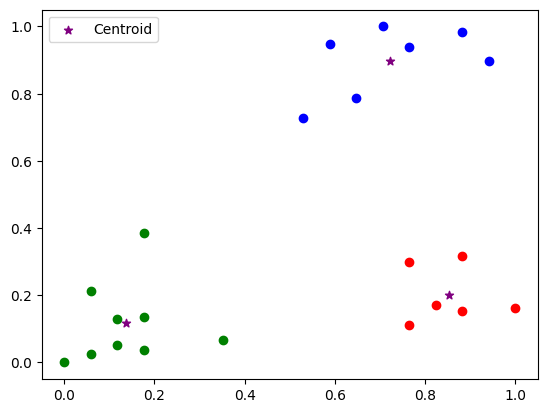

In [26]:
plt.scatter(df1["Age"], df1["Income"], color = "green")
plt.scatter(df2["Age"], df2["Income"], color = "red")
plt.scatter(df3["Age"], df3["Income"], color = "blue")


# Scatter the centroids
plt.scatter(model.cluster_centers_[:,0],  # 0 : x-values for all centriods
            model.cluster_centers_[:,1],  # 1 : y-values for all centroids
            color = "purple",
            marker = "*",
            label = "Centroid"
            )


plt.legend()

# Inertia

In [27]:
model.inertia_

0.47507834985530956

# How to find the right K-Value (number of clusters) ?

# 1. Elbow Method

Loop and try several cluster numbers and search for the minimum Interia

In [29]:
list_of_inertias = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[["Age", "Income"]]) # calculate the centroids
    
    # add the error to the list
    list_of_inertias.append(model.inertia_) 

c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

Text(0, 0.5, 'Error')

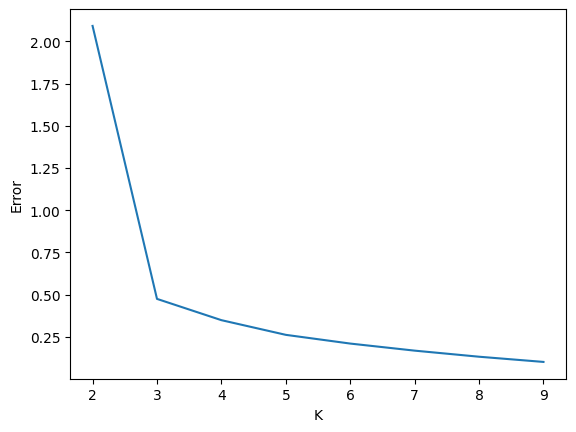

In [32]:
# Plot the Error list
plt.plot(k_range, list_of_inertias)
plt.xlabel("K")
plt.ylabel("Error")

# 2. Silhouete Score

- range between +1 and -1
- +1: means very good clustering
- 0 : point close to the boundry
- -1 : Very bad clustering --> a point is wrong clusted

In [34]:
list_of_silhouetescores = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters = k)

    # Fit the model 
    model.fit(df[["Age", "Income"]]) # calculate the centroids
    
    # add the error to the list
    s_score = silhouette_score(df[["Age", "Income", ]], model.labels_)
    
    list_of_silhouetescores.append(s_score)

c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python3108\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

# Plot the Silhouette Score

Text(0, 0.5, 'Silh. Score')

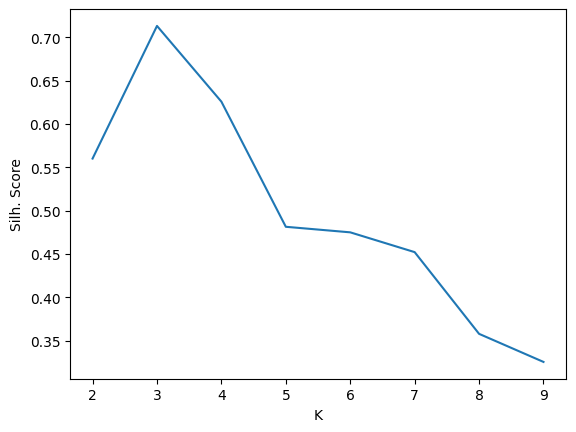

In [35]:
plt.plot(k_range, list_of_silhouetescores)
plt.xlabel("K")
plt.ylabel("Silh. Score")